In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from seaborn import distplot, heatmap, clustermap
from scipy.stats import spearmanr, pearsonr, pearson3
from pySankey import sankey

In [2]:
auc = pd.read_table('auc_mtx.txt', index_col=0, header=0 )
cell_info = pd.read_table( 'cellInfo.txt' )
cell_info2 = cell_info[ cell_info.index.isin( auc.columns ) ]

In [3]:
type(auc)

pandas.core.frame.DataFrame

In [4]:
aucz = ((auc.transpose() - auc.mean(1))/auc.std(1)).transpose()

In [5]:
c2t = cell_info2.CellType

In [6]:
r2t = pd.read_table( 'csi_clusterID_table.txt').x

In [7]:
(aucz > 2).unstack()

GCATCGCTGTTC  Tfdp1_extended (133g)     False
              Nfyb_extended (47g)       False
              Nfyb (28g)                False
              E2f2_extended (187g)      False
              E2f2 (147g)               False
              E2f8_extended (36g)       False
              E2f8 (19g)                False
              Sin3a_extended (770g)     False
              Sin3a (334g)              False
              Mxi1_extended (2236g)     False
              Hdac2_extended (91g)      False
              Dnmt1 (30g)               False
              Smarcc1_extended (26g)    False
              Maz_extended (310g)       False
              Egr3_extended (264g)      False
              Rad21_extended (234g)     False
              Pbx1_extended (202g)       True
              E2f4_extended (599g)      False
              Brca1_extended (237g)     False
              Srebf2_extended (685g)    False
              Ybx1_extended (459g)      False
              Irf8_extended (619g)

In [8]:
from collections import Counter
c = []

for (cellid,regulonid),v in ((aucz > 2).unstack()).iteritems():
    if v :
        c.append( ("c%s"%c2t[cellid], "m%s"%r2t[regulonid] ) )

In [9]:
df = pd.DataFrame(c)

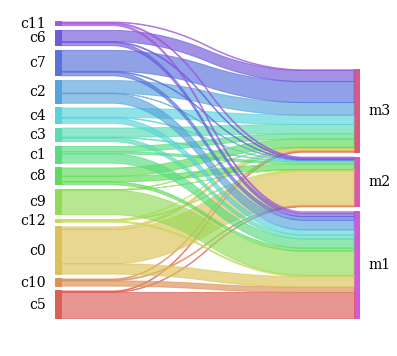

In [10]:
sankey.sankey( df[0], df[1])